In [1]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train:  (50000, 32, 32, 3)


In [2]:
#accuracy calculation
def accuracy(y_pred,y):
        batch_size=y_pred.shape[0] # number of input data
        accuracy=(1/batch_size)*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()
        return accuracy

In [3]:
std=0.1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print(Ntr)
batch_size = Ntr

iterations =  300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
train_loss_history = []
test_loss_history = []
train_acc_history = []
val_acc_history = []
lr_history=[lr]
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x = x_train[indices]
    y = y_train[indices]
    # Forward pass
    y_pred = x.dot(w1) + b1
    train_loss = 1./batch_size*np.square(y_pred-y).sum() + reg* np.sum(w1*w1)
    train_loss_history.append(train_loss)

    #testing - does not affect learning of the model
    y_pred_test=x_test.dot(w1)+b1
    test_loss = 1./Nte*np.square(y_pred_test-y_test).sum() + reg* np.sum(w1*w1)
    test_loss_history.append(test_loss)
    # calculating accuracies
    train_acc=(1/batch_size)*(np.abs(np.argmax(y,axis=1)==np.argmax(y_pred,axis=1))).sum()
    train_acc_history.append(train_acc)
    val_acc=(1/Nte)*(np.abs(np.argmax(y_test,axis=1)==np.argmax(y_pred_test,axis=1))).sum()
    val_acc_history.append(val_acc)
    if t%10==0:
        print('%d / %d: train loss:%f test loss:%f train_acc:%f test_acc:%f' % (t, iterations, train_loss,test_loss,train_acc,val_acc))
    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw1 = x.T.dot(dy_pred)+reg*w1
    db1 = dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay



w1: (3072, 10)
b1: (10,)
50000
0 / 300: train loss:0.999997 test loss:0.999998 train_acc:0.114920 test_acc:0.111900
10 / 300: train loss:0.876637 test loss:0.876237 train_acc:0.354260 test_acc:0.351600
20 / 300: train loss:0.842540 test loss:0.842417 train_acc:0.372740 test_acc:0.373400
30 / 300: train loss:0.823616 test loss:0.823715 train_acc:0.382160 test_acc:0.382100
40 / 300: train loss:0.812389 test loss:0.812707 train_acc:0.388200 test_acc:0.387300
50 / 300: train loss:0.805426 test loss:0.805970 train_acc:0.393000 test_acc:0.390300
60 / 300: train loss:0.800906 test loss:0.801679 train_acc:0.396040 test_acc:0.392100
70 / 300: train loss:0.797821 test loss:0.798824 train_acc:0.398740 test_acc:0.393800
80 / 300: train loss:0.795605 test loss:0.796834 train_acc:0.401160 test_acc:0.395100
90 / 300: train loss:0.793930 test loss:0.795381 train_acc:0.402900 test_acc:0.395800
100 / 300: train loss:0.792605 test loss:0.794270 train_acc:0.404740 test_acc:0.396300
110 / 300: train loss:0

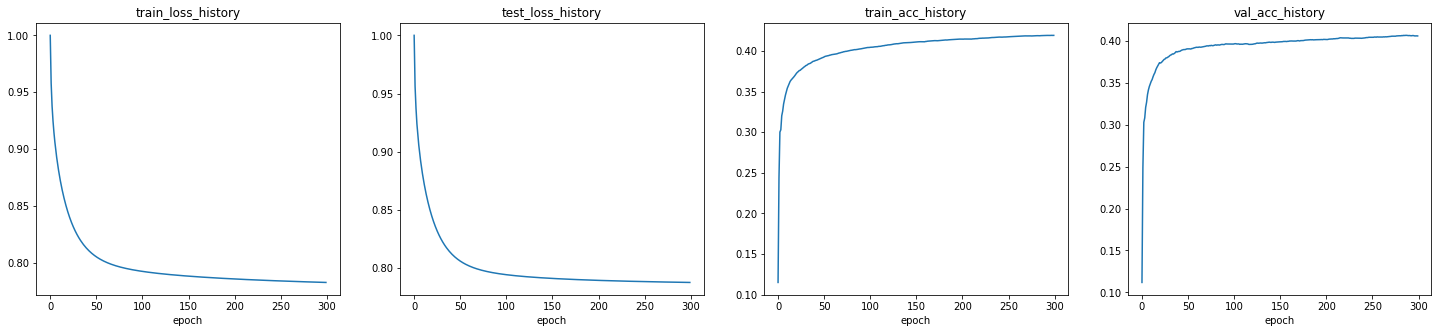

In [5]:
history_lists=[train_loss_history,test_loss_history,train_acc_history,val_acc_history]
titles=['train_loss_history','test_loss_history','train_acc_history','val_acc_history']
fig,ax=plt.subplots(1,4,figsize=(25,5))
for i in range(len(history_lists)):
        ax[i].plot(history_lists[i])
        ax[i].set_title(titles[i])
        ax[i].set_xlabel("epoch")
        ax[i].plot()


In [6]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1
batch_size=Ntr
train_acc= 1/batch_size*((np.argmax(y_train,axis=1) == np.argmax(y_pred,axis=1))).sum()
print("train_acc = ",train_acc)

x_t=x_test
y_pred=x_t.dot(w1)+b1
batch_size=Nte
test_acc= 1/batch_size*((np.argmax(y_test,axis=1) == np.argmax(y_pred,axis=1))).sum()
print("test_acc = ",test_acc)

train_acc =  0.41942
test_acc =  0.4057


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

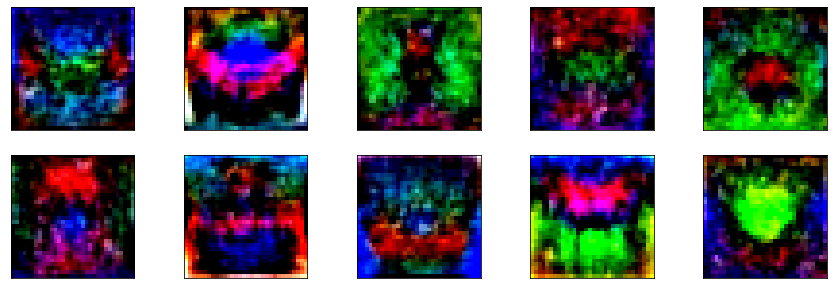

In [7]:
# displaying w as images
f,ax=plt.subplots(2,5,figsize=(15,5))
for i in range(5):
    img=(w1[:,i].reshape(32,32,3))*255
    ax[0][i].imshow(img)
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
for i in range(5,10):
    img=(w1[:,i].reshape(32,32,3))*255
    ax[1][5-i].imshow(img)
    ax[1][5-i].set_xticks([])
    ax[1][5-i].set_yticks([])
plt.show()